# XOR GATE
---

```julia
versioninfo() # v"1.11.1"
```

In [1]:
using Flux

Create the dataset for an \"XOR\" problem

In [2]:
X = rand(Float32, 2, 1_024);
# vscodedisplay(X, "X")

In [3]:
y = [xor(col[1]>.5, col[2]>.5) for col in eachcol(X)];
# vscodedisplay(y, "y")

Scatter plot of `X`

In [4]:
using Plots; # unicodeplots()

In [5]:
sc = scatter(X[1,:], X[2,:], group=y; labels=["False" "True"])
loader = Flux.DataLoader((X, y), batchsize=32, shuffle=true)

32-element DataLoader(::Tuple{Matrix{Float32}, Vector{Bool}}, shuffle=true, batchsize=32)
  with first element:
  (2×32 Matrix{Float32}, 32-element Vector{Bool},)

`mdl` is the model to be built

In [6]:
mdl = Chain(Dense( 2 => 4, tanh ),
            Dense( 4 => 4, tanh ),
            Dense( 4 => 1, σ ),
            )

Chain(
  Dense(2 => 4, tanh),                  # 12 parameters
  Dense(4 => 4, tanh),                  # 20 parameters
  Dense(4 => 1, σ),                     # 5 parameters
)                   # Total: 6 arrays, 37 parameters, 460 bytes.

Raw output before training

In [7]:
y_raw = mdl(X)

1×1024 Matrix{Float32}:
 0.501998  0.500226  0.522552  0.504522  …  0.502363  0.502288  0.512295

`opt` designates the optimizer

In [8]:
opt = Adam(.01)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

`state` contains all trainable parameters

In [9]:
state = Flux.setup(opt, mdl)

(layers = ((weight = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0], Float32[0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0], (0.9, 0.999))), σ = ()), (weight = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], Float32[0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0], (0.9, 0.999))), σ = ()), (weight = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0 0.0 0.0 0.0], Float32[0.0 0.0 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0], Float32[0.0], (0.9, 0.999))), σ = ())),)

**TRAINING PHASE**

In [10]:
vec_loss = []

Any[]

In [11]:
using ProgressMeter

In [12]:
@showprogress for epoch in 1:1_000
    for (Features, target) in loader
		# Begin a gradient context session
        loss, grads = Flux.withgradient(mdl) do m
            # Evaluate model:
            target_hat = m(Features) |> vec # loss function expects size(ŷ) = (1, :) to match size(y) = (:,)
			# Evaluate loss:
            Flux.binarycrossentropy(target_hat, target)
        end
        Flux.update!(state, mdl, grads[1])
        push!(vec_loss, loss)  # Log `loss` to `losses` vector `vec_loss`
    end
end


Progress: 100%|█████████████████████████████████████████| Time: 0:00:20

Predicted output after being trained

In [13]:
y_hat = mdl(X)
y_pred = (y_hat[1, :] .> .5);

Accuracy: How much we got right over all cases _(i.e., (TP+TN)/(TP+TN+FP+FN))_"

In [14]:
accuracy = Flux.Statistics.mean( (y_pred .> .5) .== y )

0.970703125

Plot loss vs. iteration

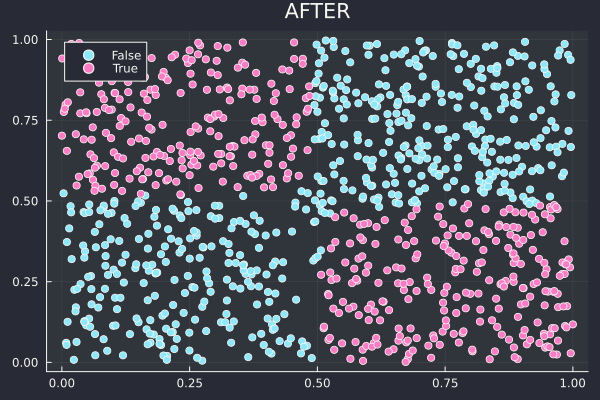

In [15]:
plot(vec_loss; xaxis=(:log10, "Iteration"), yaxis="Loss", label="Per Batch")
sc1 = scatter(X[1,:], X[2,:], group=y; title="TRUTH", labels=["False" "True"])
sc2 = scatter(X[1,:], X[2,:], zcolor=y_raw[1,:]; title="BEFORE", label=:none, clims=(0,1))
sc3 = scatter(X[1,:], X[2,:], group=y_pred; title="AFTER", labels=["False" "True"])

Plot of both ground truth and results after training

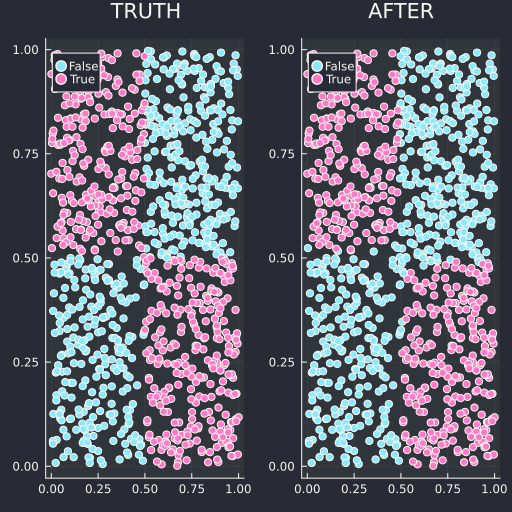

In [16]:
plot(sc1, sc3, layout=(1,2), size=(512,512))